## Train and test  on the entire dataset

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
logreg = LogisticRegression()

In [5]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
y_pred = logreg.predict(X)

In [9]:
len(y_pred)

150

## Classification accuracy
- Proportion - of correct predictions


In [10]:
from sklearn import metrics

In [11]:
print metrics.accuracy_score(y, y_pred)

0.96


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred = knn.predict(X)
print y_pred

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
print metrics.accuracy_score(y, y_pred)

0.966666666667


In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


## Train/test split

In [20]:
print X.shape
print y.shape

(150, 4)
(150,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [25]:
print X_test.shape
print X_train.shape

(60, 4)
(90, 4)


In [26]:
print y_test.shape
print y_train.shape

(60,)
(90,)


In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)

In [29]:
print metrics.accuracy_score(y_test, y_pred)

0.9


In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.933333333333


- Can we locate an even better value for K?

In [32]:
k_range = range(1, 26)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

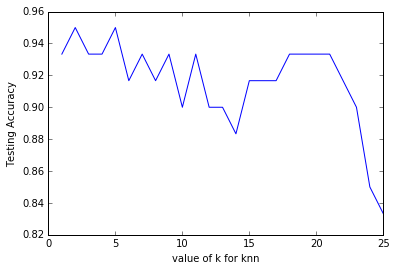

In [35]:
plt.plot(k_range, score)
plt.xlabel('value of k for knn')
plt.ylabel('Testing Accuracy')

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
knn.predict([[3, 5, 4, 2]])

array([1])